## 1. Business Problem:

The performance of many state of art NLP models is increased when the data input is in standard english domain. But, the text available in most of the cases consists of shortened words. So, it is important to preprocess this raw text before feeding it to the model.

### **Problem statement:**

In this case study, we build a model that takes the shortened/corrupted text as input and outputs the the text in standard english.

### **Business constraints:**

It is important to give correct translations of raw text, as the NLP model performance depends on this input data(which should therefore be in uncorrupted form.)

## 2.Dataset Overview:

The data we have consists of 2000 texts in raw english format and its standard version followed by its chinese translation.
We only need Raw text and standard english domain version.
 
## 3.Success metric:
As given in the research paper we will use perplexity as the metric. Perplexity metric gives the degree of 'uncertainty' a model has in predicting the text.we can also use bleu score or accuracy for the purpose.



### Imports

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pylab import *

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


## Loading the data

In [ ]:
!tar xvzf /content/gdrive/MyDrive/sm_norm_mt.tar.gz #extracting the files from the WinRAR folder 

release/
release/en2cn-2k.en2nen2cn
release/README


In [ ]:
f=open('/content/gdrive/MyDrive/release/en2cn-2k.en2nen2cn','r')
lines=f.readlines() #Reading the text inside the file

In [ ]:
lines[0:6]

['U wan me to "chop" seat 4 u nt?\n',
 'Do you want me to reserve seat for you or not?\n',
 '你要我帮你预留坐位吗？\n',
 'Yup. U reaching. We order some durian pastry already. U come quick.\n',
 'Yeap. You reaching? We ordered some Durian pastry already. You come quick.\n',
 '对。你要到了吗？我们已经点了一些榴莲糕点。你快点来。\n']

<font color='green'>So, we have the normal sms text followed by standard english version followed by its chinese translation.

<font color='green'>We only want normal and standard version of texts.


In [ ]:
index1=[]
index2=[]
j=0
for i in range(0,2000):
    #getting the indexes of texts
    index1.append(j)
    index2.append(j+1)
    j+=3
corrupted_text=[]
std_text=[]
chinese_text=[]
for i in index1:
    corrupted_text.append(lines[i])
for i in index2:
    std_text.append(lines[i])

In [ ]:
data=pd.DataFrame(zip(corrupted_text,std_text),columns=['Source','Target'])

In [ ]:
data

,Source,Target
0,"U wan me to ""chop"" seat 4 u nt?\n",Do you want me to reserve seat for you or not?\n
1,Yup. U reaching. We order some durian pastry a...,Yeap. You reaching? We ordered some Durian pas...
2,They become more ex oredi... Mine is like 25.....,They become more expensive already. Mine is li...
3,I'm thai. what do u do?\n,I'm Thai. What do you do?\n
4,Hi! How did your week go? Haven heard from you...,Hi! How did your week go? Haven't heard from y...
...,...,...
1995,Hmmm... Thk i usually book on wkends... Depend...,Hmm. I think I usually book on weekends. It de...
1996,ask them got any sms messages to gif me lei......,Can you ask them whether they have for any sms...
1997,We r near coca oredi...\n,We are near Coca already.\n
1998,hall Eleven. Got lectures le mah.èn forget abt...,Hall eleven. Got lectures. And forget about co...


In [ ]:
Source_words = data['Source'].str.split().apply(len) #Gives the count of words in each sentence
Target_words = data['Target'].str.split().apply(len)
Source_lengths = data['Source'].apply(len) # Gives the length of each sentence
Target_lengths = data['Target'].apply(len)

## Histogram of lengths of phrases

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


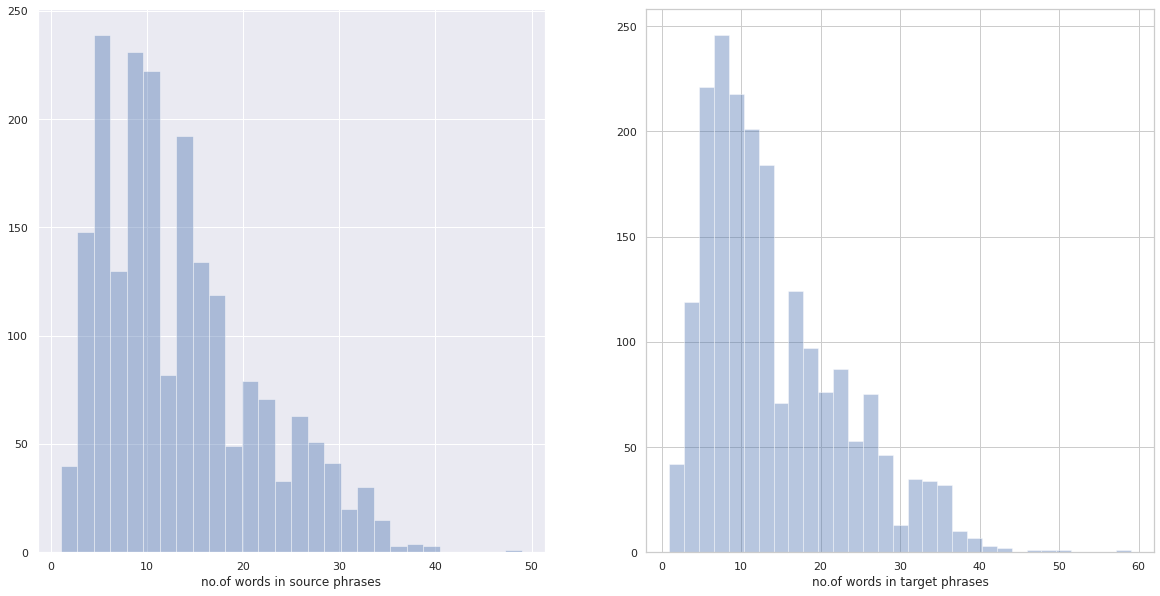

In [ ]:
#https://pythonbasics.org/seaborn-distplot/#Distplot-examples
sns.set(rc={"figure.figsize": (20,10)})

subplot(1,2,1)
ax = sns.set_style('whitegrid')
ax = sns.distplot(Source_words,kde=False, axlabel='no.of words in source phrases')

subplot(1,2,2)
ax = sns.set_style('whitegrid')
ax = sns.distplot(Target_words,kde=False, axlabel='no.of words in target phrases')

plt.show()

<font color='green'> Here, the source and target phrases that have words more than 40 are very less.

<font color='green'> Very few target phrases have words between 40 to 60.

<font color='green'> we try to calculate the exact percentile of sentences having words>40.


In [ ]:
for i in range(0,101,10):
    print(i,np.percentile(Source_words, i))
print('-----------------------')
for i in range(0,101,10):
    print(i,np.percentile(Target_words, i))

0 1.0
10 5.0
20 6.0
30 8.0
40 10.0
50 11.0
60 13.399999999999864
70 16.0
80 20.0
90 25.0
100 49.0
-----------------------
0 1.0
10 5.0
20 7.0
30 8.0
40 10.0
50 12.0
60 14.0
70 17.0
80 22.0
90 27.0
100 59.0


<font color='green'>90 percent of source phrases have the below 25 words and 90 percent of target phrases have the below 27 words. We try to see the percentile values between 90 to 100.

In [ ]:
for i in range(90,101):
    print(i,np.percentile(Source_words, i))
print('-----------------------')
for i in range(90,101):
    print(i,np.percentile(Target_words, i))

90 25.0
91 26.0
92 27.0
93 28.0
94 28.0
95 29.0
96 30.0
97 31.0
98 32.01999999999998
99 34.0
100 49.0
-----------------------
90 27.0
91 28.0
92 29.0
93 29.070000000000164
94 31.0
95 32.0
96 33.0
97 34.0
98 35.01999999999998
99 38.0
100 59.0


In [ ]:
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(Source_words, i))
print('-----------------------')
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(Target_words, i))

99.1 35.0
99.2 35.0
99.3 35.0
99.4 35.0
99.5 36.0
99.6 36.003999999999905
99.7 37.0
99.8 37.003999999999905
99.9 39.001000000000204
100 49.0
-----------------------
99.1 38.0
99.2 38.00800000000004
99.3 39.0
99.4 39.0
99.5 40.0
99.6 41.003999999999905
99.7 42.00299999999993
99.8 43.00599999999986
99.9 48.00200000000041
100 59.0


<font color='green'> It means 99.9 percent of the Source phrases have below 39 words in them and 99.9 percent of the target phrases have below 48 words in them.
So, we consider only the lines that have 39 or less number of words. Rest are discarded as outliers.

<font color='green'>Similarly, We Identify the outliers based on lengths of sentences.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


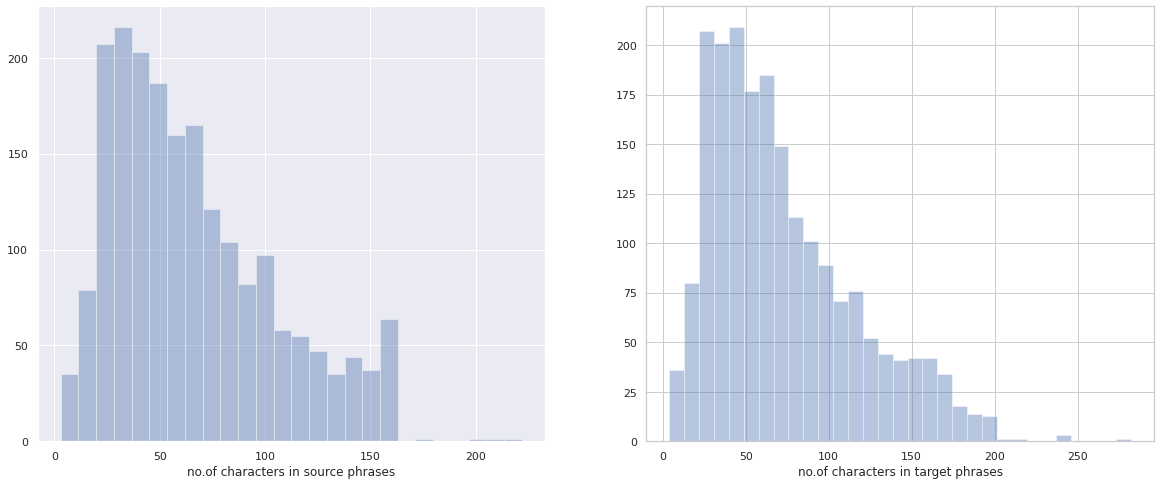

In [ ]:
sns.set(rc={"figure.figsize": (20,8)})

subplot(1,2,1)
ax = sns.set_style('whitegrid')
ax = sns.distplot(Source_lengths,kde=False, axlabel='no.of characters in source phrases')

subplot(1,2,2)
ax = sns.set_style('whitegrid')
ax = sns.distplot(Target_lengths,kde=False, axlabel='no.of characters in target phrases')

plt.show()

In [ ]:
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(Source_lengths, i))
print('-------------------------')
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(Target_lengths, i))

99.1 160.0
99.2 160.00800000000004
99.3 161.0
99.4 161.0
99.5 161.0
99.6 161.0
99.7 161.0
99.8 162.01999999999953
99.9 203.0030000000006
100 222.0
-------------------------
99.1 193.0
99.2 193.01600000000008
99.3 197.00700000000006
99.4 198.0
99.5 199.00499999999988
99.6 201.0
99.7 201.0209999999995
99.8 216.04999999999882
99.9 242.0030000000006
100 282.0


<font color='green'>99.9 percent of the source sentences have lengths less than 162 and 99.9 percent of the target sentences have lengths lesser then 201.

In [ ]:
data.to_csv('/content/gdrive/MyDrive/CS_2/data',index=False)